---
layout: post
title:  "[Machine Learning] Linear Regression"

categories : Machine_Learning
  
tags:
  - Machine Learning
  - Deep Learning
  - AI
  - Tensorflow
  - Python
---



머신러닝과 딥러닝에 대해 공부해보려고 합니다   
모두를 위한 머신러닝/딥러닝 강의를 수강하고 배운 것들을 정리해보겠습니다   
[참고] (https://hunkim.github.io/ml/)   

## Linear Regression
### Regression 
- Training Data

    |x|y|
    |--|--|
    |1|1|
    |2|2|
    |3|3|
  
* * *   

### Linear Hypothesis 
우리의 데이터들과 맞아 떨어지는 어떠한 **선형적인 모델**
> H(x)= Wx + b     

- linear model 을 통한 가설을 세운다

- 어떤 방정식이 더 가설과 잘 맞을까 ?
가장 적합한 W와 b값을 구해야함! -> 더 좋은 모델    

* * *

### Cost Function
= Loss function   
- 우리가 세운 Linear Hypothesis와 실제 데이터가 얼마나 다른가?
>       H(x)-y      -> 음수가 나올수도 있기 때문에 좋은 식은 아니다   
>       (|H(x)-y|)^2

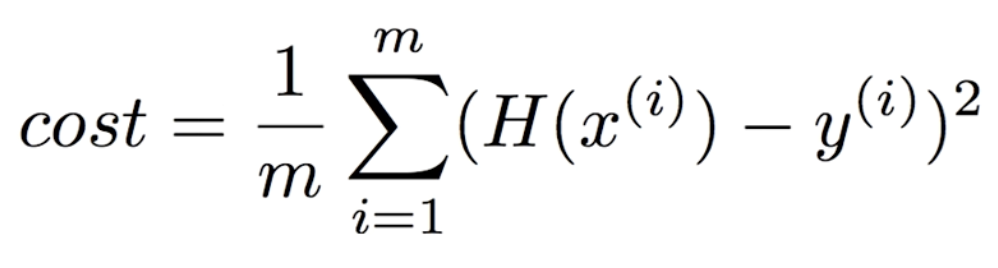
m = 학습 데이터의 개수   
cost = 예측한 값과 실제 값의 차이의 제곱을 다 더한 후 학습 데이터의 개수로 나누어준다   

- Minimize Cost
> Linear Regression의 목표   
> -> Cost의 값이 가장 작게 하도록 W와 b를 설정한다!


## TensorFlow로 구현하기

### 1) Build graph using TF operations

H(x) = Wx + b 의 선형식에서 W와 b 구하기
tensorFlow를 통한 regression graph 구현하기

- Variable : tensorflow가 변경시키는 값 (trainable variable)
- 만드는 법 
    - shape에 랜덤한 값을 넣어준다   
 tf.random_normal([1]) : rank가 1이고 값이 1인 array

    - 이름 선언

In [41]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# X and Y data가 주어짐
x_train = [1,2,3]
y_train = [1,2,3]


W = tf.Variable(tf.random.normal([1]), name="weight")
b = tf.Variable(tf.random.normal([1]), name="bias")
# Our hypothesis XW + b
hypothesis = x_train * W + b

# cost/Loss function
# tf.reduce_mean -> tensor들의 평균값을 반환해준다
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

#Minimize -> GradientDescent 이용
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)
print(train)

name: "GradientDescent_6"
op: "NoOp"
input: "^GradientDescent_6/update_weight_6/ApplyGradientDescent"
input: "^GradientDescent_6/update_bias_6/ApplyGradientDescent"



### 2) Run/update graph and get results
regression을 실행하기 위한 session을 만들고 W,b와 같은 Variable을 그래프에 global Variable로 초기화 해줘야한다


In [42]:
# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

# Fit the line
for step in range(2001):
    sess.run(train)
    # 2001번 출력은 너무 많으니까 줄임
    if step % 20  == 0:
         print(step, sess.run(cost), sess.run(W),sess.run(b) )

0 3.1567323 [-0.51988447] [1.7682738]
20 0.56634915 [0.08483654] [1.9197675]
40 0.49350792 [0.17862557] [1.8518835]
60 0.44802266 [0.22206235] [1.7669789]
80 0.4068997 [0.25908297] [1.6841397]


2023-01-15 22:15:43.107442: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-15 22:15:43.107458: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-01-15 22:15:43.128914: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-15 22:15:43.160913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-15 22:15:43.177719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-15 22:15:43.18

100 0.3695528 [0.29394722] [1.6050106]
120 0.33563364 [0.32713333] [1.5295829]
140 0.3048279 [0.358756] [1.4576982]
160 0.27684963 [0.3888921] [1.3891919]
180 0.25143915 [0.41761196] [1.3239048]
200 0.22836113 [0.44498208] [1.2616863]
220 0.20740119 [0.47106585] [1.2023915]
240 0.18836503 [0.49592388] [1.1458834]
260 0.17107612 [0.5196135] [1.0920311]
280 0.15537404 [0.54219013] [1.0407094]
300 0.14111316 [0.5637055] [0.99179995]
320 0.12816125 [0.5842097] [0.9451891]
340 0.11639807 [0.6037504] [0.90076864]
360 0.105714634 [0.6223726] [0.8584358]
380 0.09601171 [0.64011973] [0.8180924]
400 0.08719935 [0.6570328] [0.77964514]
420 0.07919585 [0.673151] [0.7430047]
440 0.071926944 [0.68851167] [0.70808625]
460 0.06532521 [0.7031504] [0.6748089]
480 0.05932939 [0.7171012] [0.6430954]
500 0.05388398 [0.73039645] [0.6128724]
520 0.048938334 [0.74306667] [0.5840698]
540 0.04444652 [0.75514156] [0.5566206]
560 0.04036708 [0.76664907] [0.5304616]
580 0.03666204 [0.77761567] [0.5055319]
600 0.03

- Placeholder
: x, y data를 직접 값을 주지 않고 Placeholder를 사용하여 필요할때 노드를 주고 필요할 때 마다 값을 던져준다 

In [43]:
X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

for step in range(2001):
    cost_val, W_val, b_val, _ = sess.run([cost,W,b,train], 
        feed_dict = {X:[1,2,3,4,5], Y:[2.1,3.1,4.1,5.1,6.1]})
    if step % 20 ==0 :
        print(step, cost_val, W_val, b_val)

0 3.941264e-05 [0.992726] [0.01653547]
20 3.579502e-05 [0.99306786] [0.01575835]
40 3.2509713e-05 [0.99339366] [0.01501776]
60 2.952654e-05 [0.9937042] [0.01431197]
80 2.681687e-05 [0.994] [0.01363935]


2023-01-15 22:15:45.243245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100 2.4354831e-05 [0.994282] [0.01299835]
120 2.2119491e-05 [0.9945507] [0.01238749]
140 2.008957e-05 [0.9948068] [0.01180531]
160 1.8245053e-05 [0.9950509] [0.0112505]
180 1.6570753e-05 [0.9952835] [0.01072175]
200 1.50501855e-05 [0.99550515] [0.01021788]
220 1.3668358e-05 [0.9957164] [0.00973767]
240 1.2414077e-05 [0.9959177] [0.00928003]
260 1.1274696e-05 [0.99610955] [0.00884391]
280 1.0239557e-05 [0.9962924] [0.00842827]
300 9.299448e-06 [0.9964667] [0.00803216]
320 8.446204e-06 [0.9966327] [0.00765468]
340 7.670927e-06 [0.99679095] [0.00729494]
360 6.967037e-06 [0.99694175] [0.00695212]
380 6.327589e-06 [0.99708545] [0.00662542]
400 5.746848e-06 [0.9972224] [0.00631405]
420 5.219524e-06 [0.99735296] [0.00601734]
440 4.7404587e-06 [0.99747735] [0.00573457]
460 4.3052523e-06 [0.9975959] [0.00546505]
480 3.910025e-06 [0.9977089] [0.00520823]
500 3.5513247e-06 [0.99781656] [0.00496348]
520 3.2251742e-06 [0.99791914] [0.0047302]
540 2.9291339e-06 [0.99801695] [0.00450792]
560 2.660386